Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x1 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_all.csv?raw=true', compression = None)
x = x1.drop(x1.columns[0], axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(900, 3000, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((150,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
y = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])

One Hot Encoder

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 341 kB/s 


In [ ]:
from category_encoders.one_hot import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
yn2 = OneHotEncoder(cols=[0])
y_OHE = yn2.fit_transform(y)
y_OHE

,0_1,0_2,0_3,0_4,0_5,0_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
895,0,0,0,0,0,1
896,0,0,0,0,0,1
897,0,0,0,0,0,1
898,0,0,0,0,0,1


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_OHE, test_size=0.33, random_state=42)



CNN 1D

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2998, 32)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 2996, 32)          3104      
                                                                 
 flatten (Flatten)           (None, 95872)             0         
                                                                 
 dropout (Dropout)           (None, 95872)             0         
                                                                 
 dense (Dense)               (None, 6)                 575238    
                                                                 
Total params: 578,470
Trainable params: 578,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=16, epochs=5)

Epoch 1/5
38/38 [==============================] - 4s 78ms/step - loss: 0.5040 - accuracy: 0.2687
Epoch 2/5
38/38 [==============================] - 3s 77ms/step - loss: 0.3125 - accuracy: 0.5721
Epoch 3/5
38/38 [==============================] - 3s 76ms/step - loss: 0.2108 - accuracy: 0.8093
Epoch 4/5
38/38 [==============================] - 3s 76ms/step - loss: 0.1147 - accuracy: 0.9370
Epoch 5/5
38/38 [==============================] - 3s 77ms/step - loss: 0.0592 - accuracy: 0.9884


In [ ]:
avaliacao = model.evaluate(x_train,y_train)

19/19 [==============================] - 1s 33ms/step - loss: 0.0332 - accuracy: 0.9950


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1)

testY = y_test.values
y_labels = np.argmax(testY, axis=1)

In [ ]:
y_pred

array([4, 5, 1, 0, 4, 0, 2, 2, 4, 4, 3, 5, 3, 3, 4, 4, 1, 1, 2, 5, 5, 1,
       4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 2, 3, 1, 4, 3, 4, 5, 4, 3, 1, 5, 1,
       4, 4, 1, 5, 4, 5, 3, 3, 5, 2, 4, 4, 3, 3, 3, 5, 4, 5, 4, 2, 4, 4,
       4, 5, 5, 1, 1, 4, 5, 3, 5, 2, 5, 4, 0, 4, 5, 3, 3, 4, 5, 5, 5, 4,
       1, 3, 2, 5, 5, 1, 5, 5, 0, 1, 4, 5, 3, 5, 5, 3, 2, 1, 4, 4, 3, 4,
       5, 4, 5, 3, 5, 3, 3, 3, 5, 2, 5, 1, 1, 5, 4, 3, 4, 5, 1, 3, 4, 1,
       5, 3, 3, 1, 4, 3, 5, 1, 4, 0, 4, 5, 5, 1, 5, 4, 3, 4, 4, 4, 5, 5,
       2, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 5, 1, 4, 4, 5, 5, 5, 5, 2, 4, 5,
       4, 3, 1, 4, 1, 2, 0, 4, 5, 5, 3, 1, 3, 1, 4, 5, 4, 5, 5, 4, 1, 5,
       5, 2, 5, 5, 4, 1, 4, 5, 1, 3, 5, 4, 5, 5, 3, 4, 4, 5, 5, 2, 1, 3,
       4, 5, 3, 5, 0, 4, 5, 5, 5, 5, 3, 5, 5, 1, 4, 0, 4, 4, 4, 5, 5, 5,
       5, 1, 5, 1, 5, 5, 5, 5, 4, 4, 4, 1, 5, 4, 5, 4, 0, 5, 5, 4, 5, 5,
       5, 4, 4, 4, 5, 2, 4, 5, 4, 1, 5, 5, 5, 5, 3, 5, 4, 5, 3, 4, 0, 5,
       5, 0, 4, 1, 4, 4, 5, 4, 4, 3, 0])

In [ ]:
y_labels

array([0, 5, 1, 3, 0, 4, 1, 0, 0, 0, 0, 3, 5, 0, 4, 3, 1, 2, 2, 0, 1, 4,
       4, 2, 3, 2, 0, 5, 4, 3, 1, 5, 1, 3, 4, 4, 0, 3, 2, 1, 0, 1, 2, 4,
       4, 4, 1, 3, 3, 5, 3, 2, 3, 1, 1, 1, 0, 2, 2, 3, 0, 2, 4, 2, 1, 1,
       4, 3, 2, 2, 4, 3, 5, 2, 0, 5, 2, 3, 0, 4, 3, 1, 3, 0, 5, 5, 2, 3,
       1, 3, 2, 3, 5, 5, 5, 2, 0, 1, 4, 5, 3, 2, 3, 2, 5, 1, 4, 1, 4, 1,
       5, 5, 5, 3, 5, 3, 5, 5, 0, 5, 2, 1, 1, 2, 5, 0, 1, 5, 2, 0, 3, 4,
       2, 0, 5, 1, 4, 5, 3, 1, 1, 0, 4, 2, 4, 1, 5, 1, 3, 0, 0, 4, 2, 3,
       2, 0, 0, 2, 2, 0, 2, 4, 4, 2, 3, 3, 0, 0, 4, 3, 2, 2, 0, 2, 3, 5,
       3, 5, 0, 0, 0, 2, 1, 4, 2, 3, 0, 1, 2, 0, 0, 2, 3, 5, 2, 0, 4, 2,
       5, 2, 5, 3, 4, 1, 4, 3, 2, 5, 5, 4, 2, 3, 2, 4, 3, 2, 3, 1, 0, 3,
       1, 2, 2, 0, 1, 4, 3, 5, 2, 2, 2, 5, 2, 0, 1, 3, 3, 1, 1, 3, 5, 3,
       2, 2, 2, 2, 3, 2, 5, 2, 3, 4, 4, 1, 5, 0, 0, 1, 3, 5, 2, 3, 0, 3,
       3, 3, 4, 4, 5, 1, 4, 4, 1, 1, 5, 3, 5, 5, 0, 5, 1, 5, 5, 0, 0, 3,
       3, 0, 1, 0, 3, 1, 2, 4, 4, 3, 0])

In [ ]:
cm = confusion_matrix(y_labels, y_pred)
print(cm)

[[ 6  7  1 10 16  9]
 [ 2 16  5  1 20  1]
 [ 0  6  7  9  0 37]
 [ 3  0  0 11 16 28]
 [ 1  6  0  1 30  2]
 [ 0  1  3  8  2 32]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.12244898, 0.35555556, 0.11864407, 0.18965517, 0.75      ,
       0.69565217])

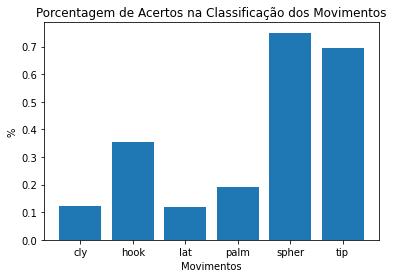

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.2606465440096869

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 11.3 MB 21.9 MB/s 
     |████████████████████████████████| 156 kB 65.0 MB/s 
     |████████████████████████████████| 15.7 MB 42.9 MB/s 
     |████████████████████████████████| 103 kB 80.9 MB/s 
     |████████████████████████████████| 191 kB 81.7 MB/s 
     |████████████████████████████████| 11.2 MB 42.7 MB/s 
     |████████████████████████████████| 843 kB 68.6 MB/s 
     |████████████████████████████████| 41 kB 486 kB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 890 kB 46.3 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 6.5 MB 42.0 MB/s 
     |████████████████████████████████| 461 kB 45.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

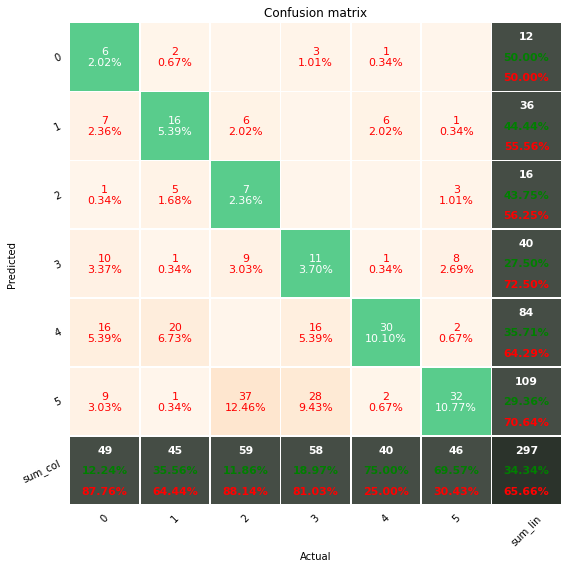

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

#pp_matrix_from_data(y_test, y_pred)
pp_matrix(df_cm)